# Lab: Streamfunction and transport budget
## A case study of ice sheet melting and the Antarctic Meridional Overturning Circulation

In this lab we examine the effect of ice sheet melt on the Atlantic Meridional Overturning Circulation and the subsequent impact on local climate. To do so, we will look at how to use the following tools:
- Streamfunction
- Transport budget
- Model grids


##Colaboratory and Google Drive
Use this command to mount your Google drive. This is not required to run the lab (figures and movies will be saved to the Colab virtual machine and played in your browser). But if you would like to save output you can do so by navigating to drive/'My Drive'. Click **SHIFT + ENTER** or click the arrow on the upper left of the following code box to run it.

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
!ln -s "/gdrive/My Drive/" "/content/"'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly&response_type=code

Enter your authorization code:



ValueError: ignored

## 1. Background
As rendered famous by the movie "The day after tomorrow", the Gulf Stream is an ocean current that transports hot ocean water from the tropics northwards, and more specifically north-eastward. This ocean current is part of the North Atlantic subropical gyre and is thus the upper ocean part of the Atlantic overturning circulation, transporting heat northward, which then cools down, sinks and returns southward at depth. Some recent studies suggests that this overturning circulation might have slowed down in the recent decades due to warming leading to a slow down of the sinking of the water in the North Atlantic and, in turn, of the full Antarctic Meridional Overturning Circulation (AMOC). Changes in the surface density affects the capacity of the water to sink as part of this overturning circulation and so can  affect the strength of the AMOC. Warmer or fresher water is less dense and thus harder to sink to the deeper higher densities. Here we look at the effect of the addition of freshwater at the ocean surface to the strength of the AMOC, and consequently on the northward heat transport.

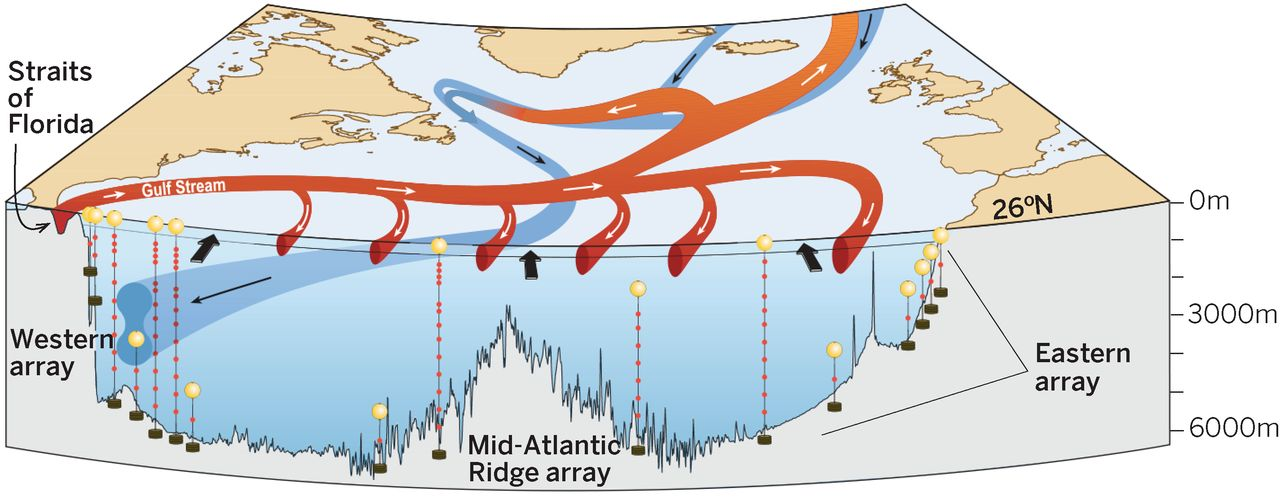

Source: Srokosz, M.A. and H.L. Bryden, 2015: Observing the Atlantic Meridional Overturning Circulation yields a decade of inevitable surprises. Science, DOI: 10.1126/science.1255575. Figure 1.

## 2. Model

### 2.1 Mk3L
For this lab, we are using model outputs produced by the CSIRO Mk3L model. This is the low-resolution version of the CSIRO climate system model (e.g. IPCC 1st, 2nd, 3rd, 4th and 5th Assessment Reports) designed to enable millennial-scale simulations of climate
variability and change. It is a fully coupled atmosphere-land-sea ice-ocean general circulation community model.
- Atmosphere:
Three-dimensional general circulation model
Horizontal resolution of 5.6$^o$x 3.2$^o$ with 18 vertical levels

- Ocean:
Three-dimensional general circulation model
Horizontal resolution of 2.8$^o$x 1.6$^o$ with 21 vertical levels

- Sea ice:
Dynamic-thermodynamic sea ice model
Three layers (two ice, one snow)

- Land surface:
Soil-canopy scheme (13 land surface/vegetation types, 9 soil types)
Six soil layers, three snow layers

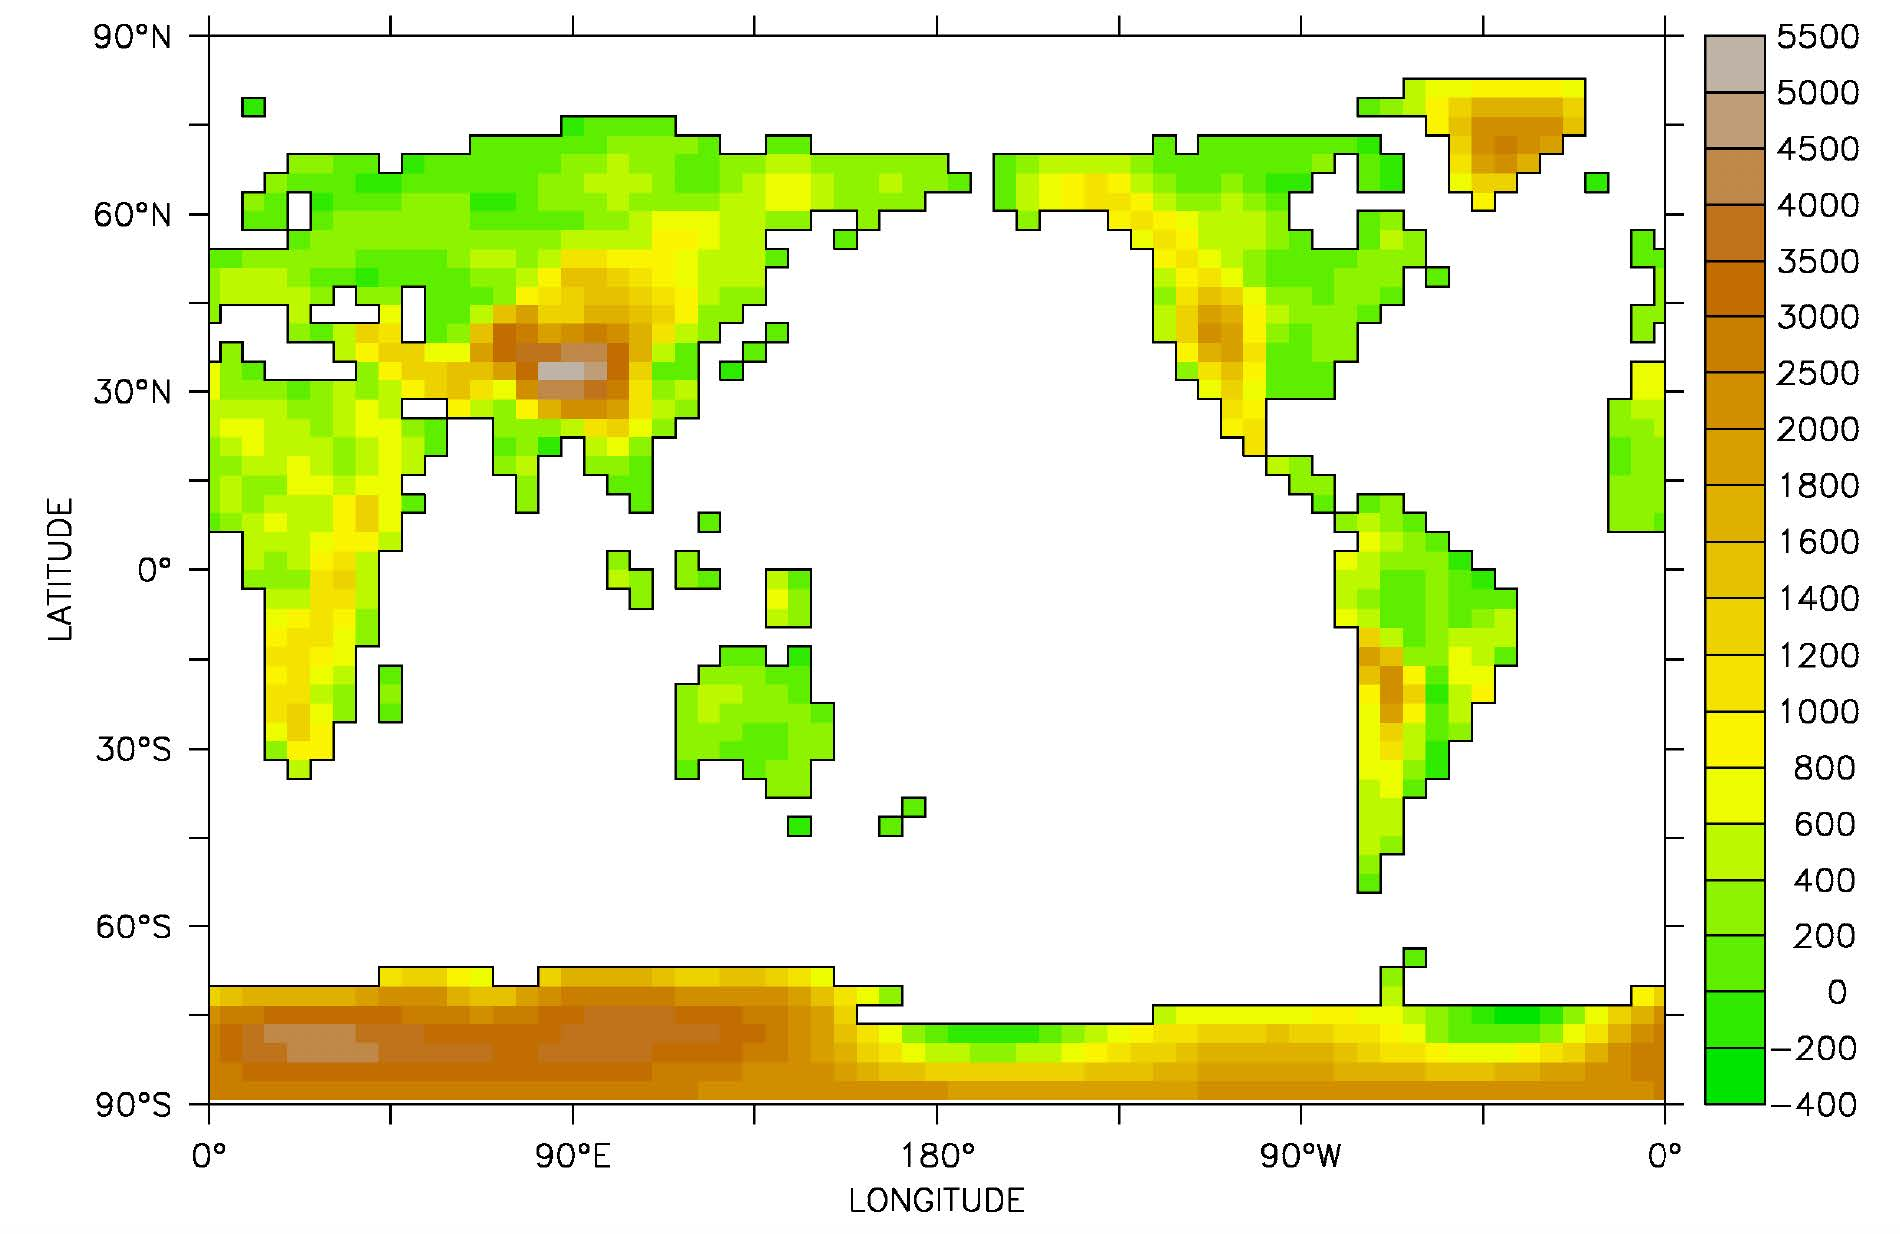
Topography in Mk3L

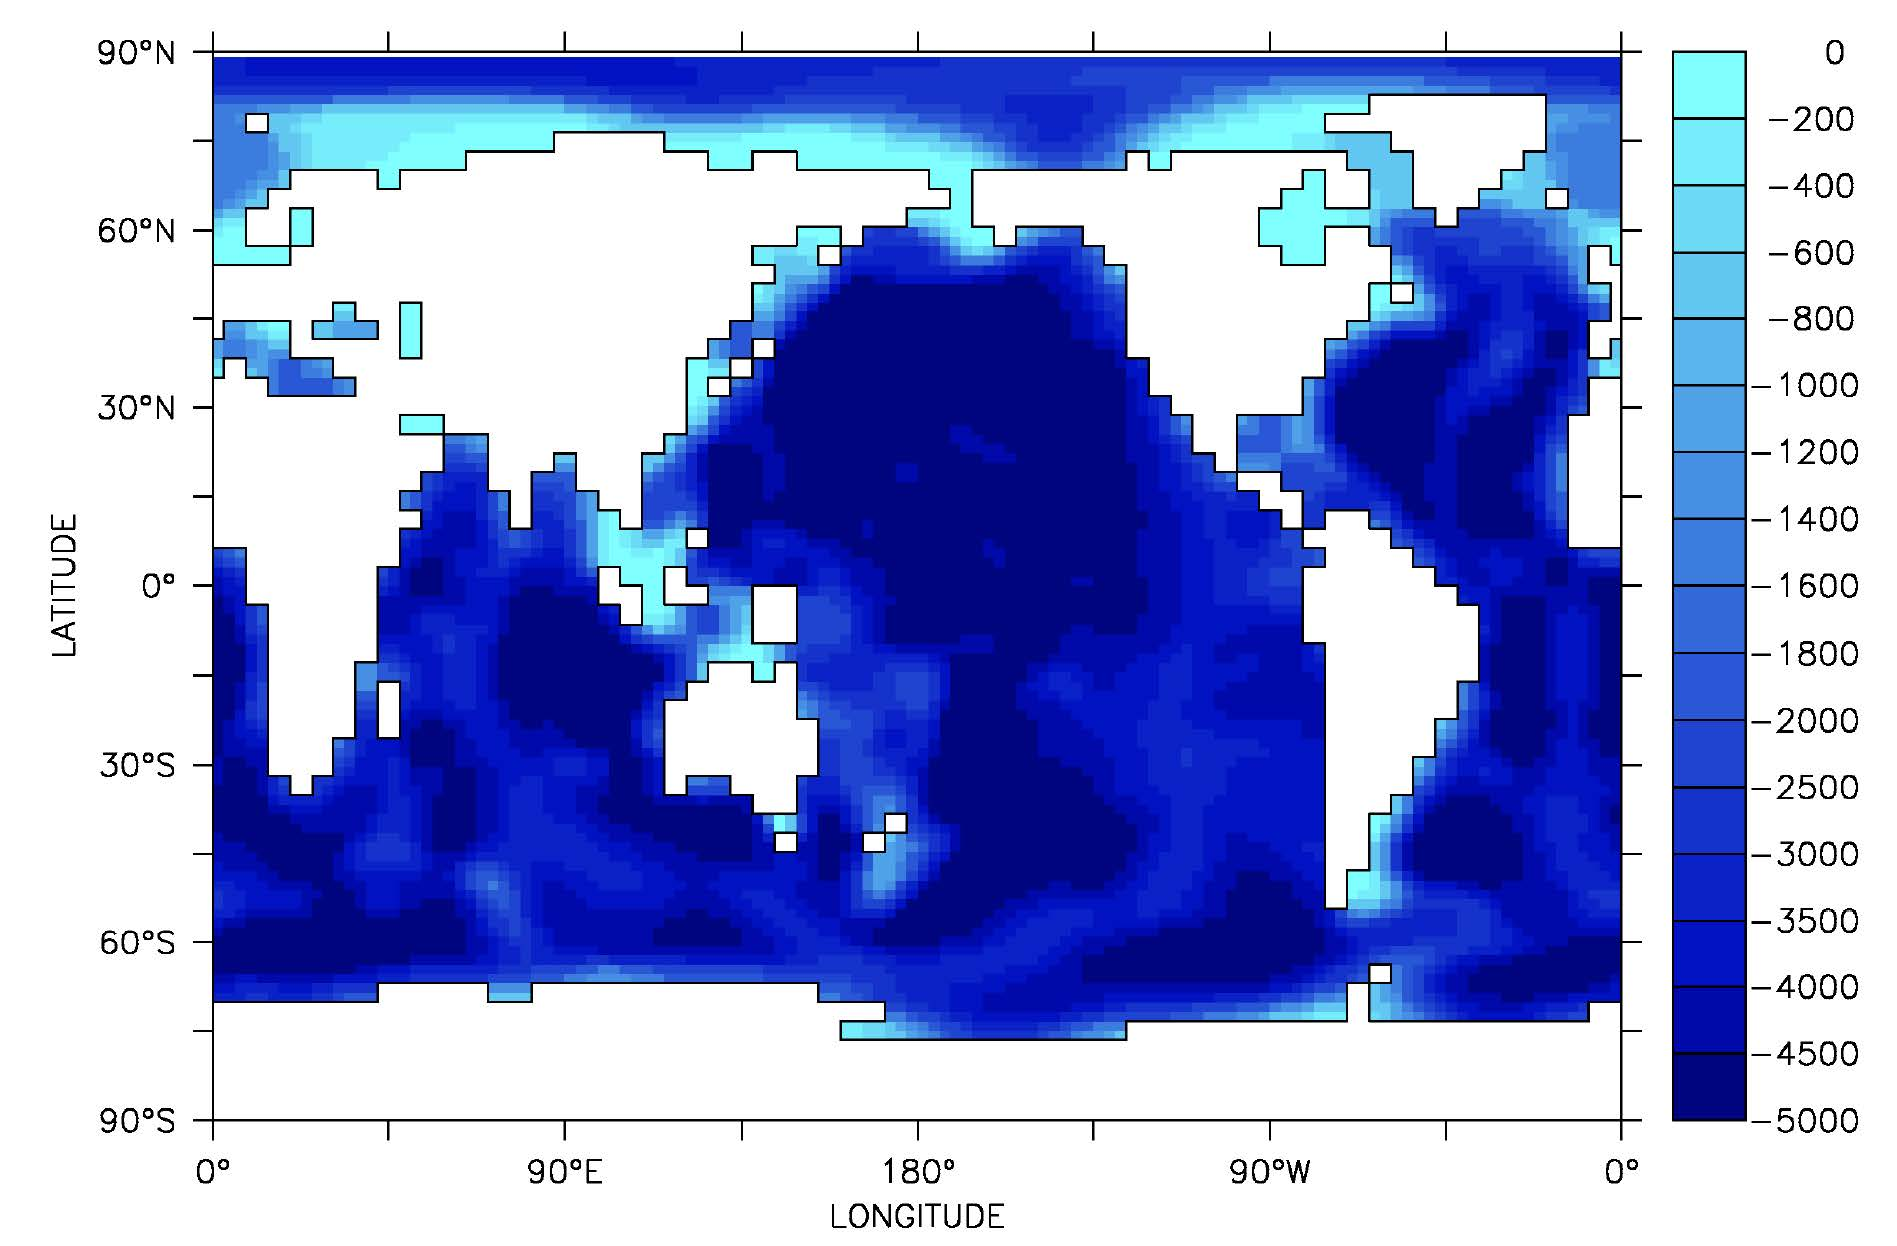
Bathymetry in Mk3L

### 2.2 Experiments

The data for three experiments is given:
- Control
- Greenland's icesheet melt
- Antarctic's ice sheet melt

These are idealized experiments with every forcing kept constant year after year  (i.e. radiative forcing, constant CO2 concentration at 280ppm). Only one variable is changed from the Control experiment (Ctl), freshwater was added at the ocean's surface around Greenland (hoseG) or around Antarctica (hoseA). Each experiment ran for 100 years starting from the same pre-industrial (1950) equilibrium.




### 2.3 Reading output data

The data for this lab are netcdf output files that were produced by Mk3L. These output files are stored on Google Drive. In order to access these, you need to import the file to this working environment. This code is simply an example, where the Control experiment's ocean data are imported in the work environment.  The series of numbers and letter after "--id" is the specific file id, which acts as its "adress" and what you'll need to change to import different files.



In [ ]:
!gdown --id 13PdbpwZg3uJcnguOkF-CQVvh4NTxXeSF

Downloading...
From: https://drive.google.com/uc?id=13PdbpwZg3uJcnguOkF-CQVvh4NTxXeSF
To: /content/oce.Ctl.nc
728MB [00:18, 40.0MB/s]


For future reference,

- The hoseG ocean data have the id: 1fdBE2Afm2xwpLQ5xVZ-zxE_XH9xGDIXv

- The hoseA ocean data have the id: 1cFiG_I9QwFfh0wVGZBkeTLqLNsb8iKDX

- The model grid specifications are in the file id: 169cOKFptAEpmhCt1j54iYjgTEY_y_A_e

You will need these later.

### 2.4 Grid

Earth system models with rectangular grids usually have one of three differents grid cell type: Arakawa A-grid, Arakawa B-grid or  Arakawa C-grid; although there's more types of grid than these (e.g. Arakawa D-grid, Arakawa E-grid, Arakawa Z-grid, unstructured triangular, etc.). The difference between the rectangular grid types is the location of mass-related quantities (i.e. tracers such as temperature, salinity, density,...) and velocity related quantity with allow movement of the mass related quantities between cells. Most ocean model also have a tripolar grid to avoid a singularity in the north pole within the Arctic Ocean. Here, we will simply focus on the Mk3L model grid, which has an Arakawa B-grid.


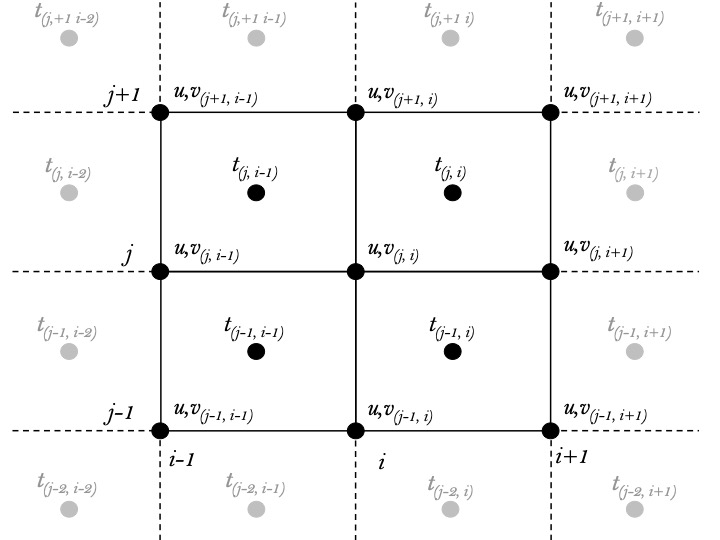

Arakawa B-grid horizontal plane. t is the mass quantity, u and v are the zonal and meridional velocity respectively, and i and j are the cell indexes.


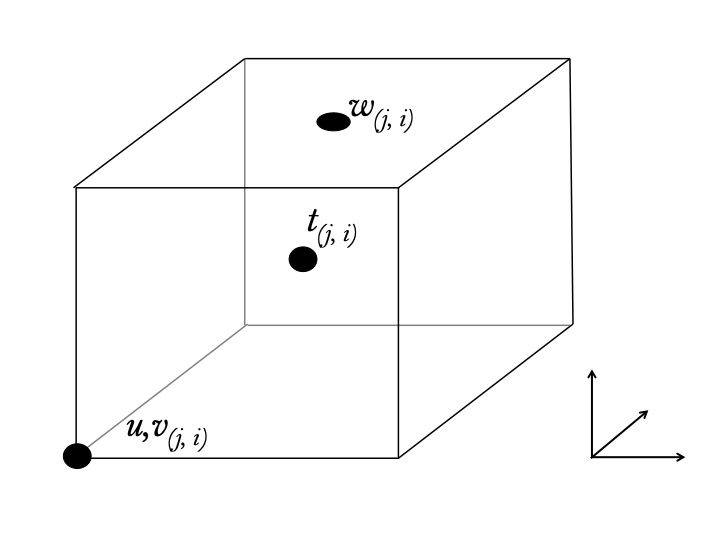

Arakawa B-grid vertical representation. t is the mass quantity, u, v and w are the zonal, meridional and vertical velocity respectively, and i and j are the cell indexes.





To visualise the grid of these data, first let's load the grid file.

In [ ]:
!gdown --id 169cOKFptAEpmhCt1j54iYjgTEY_y_A_e

Downloading...
From: https://drive.google.com/uc?id=169cOKFptAEpmhCt1j54iYjgTEY_y_A_e
To: /content/grid_spec_mk3l_128_112_21_v2.nc
5.06MB [00:00, 78.9MB/s]


#### Libraries

Python makes extensive use of freely available, open source libraries, which contain tonnes of useful functions that you use. Some of the standard libraries we will use are: numpy, which contains useful functions for carrying out numerics and matplotlib, which allows us to plot data. Here, because the model files are in netcdf, we also need to install the netcdf library, which isn't pre-installed in colaboratory. Click on the arrow on the left of the following cell to run the code and install the netcdf library, and also inport numpy and matplotlib. The last line instructs matplotlib to plot figures in the Colaboratory notebook, that way, you will be able to view and save figures within the notebook.

In [ ]:
# Install the netcdf library
!pip install netcdf4

# import library
import netCDF4 as nc4

# Numerics
import numpy as np

# Plotting
import matplotlib.pyplot as plt

# plot figures in Colaboratory notebook
%matplotlib inline

     |████████████████████████████████| 4.7MB 8.5MB/s 
     |████████████████████████████████| 317kB 56.5MB/s 


Now we can look at the variables inside the file.

In [ ]:
f = nc4.Dataset('grid_spec_mk3l_128_112_21_v2.nc','r')
print(f)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    dimensions(sizes): lonts(128), lonuv(128), latts(112), latuv(112), zts(21), bnds(2)
    variables(dimensions): float64 lonts(lonts), float64 lonuv(lonuv), float64 latts(latts), float64 latuv(latuv), float64 zts(zts), float64 lonts_bnds(bnds, lonts), float64 lonuv_bnds(bnds, lonuv), float64 latts_bnds(bnds, latts), float64 latuv_bnds(bnds, latuv), float64 zts_bnds(bnds, zts), float64 dats(latts, lonts), float64 dauv(latuv, lonuv), float64 dvts(zts, latts, lonts), float64 dvuv(zts, latuv, lonuv)
    groups: 


The lonts/latts variables are the longitudes/latitudes at the mass quantities' location of the B-grid cells (centre of the cell). The lonuv/latuv variables are the longitudes/latitudes at the horizontal velocities' location of the B-grid cells (lower left corner of each cell).

Now, let's read and plot the lonts/latts variables to visualise the grid. But first, we need to import the numpy and matplotlib libraries.

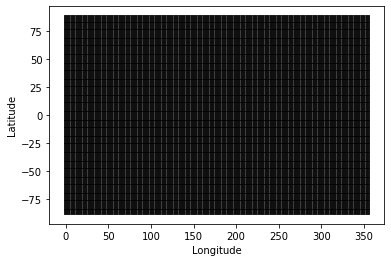

In [ ]:
# Read lonts/latts variables
with nc4.Dataset('grid_spec_mk3l_128_112_21_v2.nc', mode='r') as ncfid:
     lonts   = ncfid.variables['lonts'][:]
     latts   = ncfid.variables['latts'][:]

# Plot grid using loops to trace each line
for i in range(0,len(lonts)):
  # For each longitude, create array 
  x = lonts[i]*np.ones(len(latts))
  plt.plot(x, latts,"k-")

for j in range(0,len(latts)):
  # For each longitude, create array 
  y = latts[j]*np.ones(len(lonts))
  plt.plot(lonts, y,"k-")

plt.ylabel('Latitude')
plt.xlabel('Longitude')

plt.show()

It's hard to see the grid properly at this density, so try to modify the code to see every 5 grid cells.

Clue: add the incrementation in the loops range.

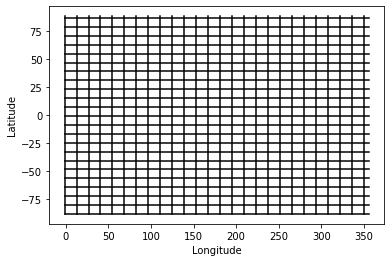

In [ ]:
# Modify this code

# Plot grid using loops to trace each line
for i in range(0,len(lonts),5):
  # For each longitude, create array 
  x = lonts[i]*np.ones(len(latts))
  plt.plot(x, latts,"k-")

for j in range(0,len(latts),5):
  # For each longitude, create array 
  y = latts[j]*np.ones(len(lonts))
  plt.plot(lonts, y,"k-")

plt.ylabel('Latitude')
plt.xlabel('Longitude')

plt.show()

The grid cells look identical in size. We will calculate the cell's size in kilometers. 

To find the distance in kilometers for a distance in degrees on the Earth, we have to calculate the arc length of a circle of radius R for an angle $\theta$, which is
$$L = \frac{\theta}{360^o}2\pi R$$ 
To calculate the arc length for the latitude, the radius of the Earth is constant if we assume a spherical planet. Although, the circle that defines the degrees angle of longitude shrinks from the equator to the poles. To find the radius at a given latitude, one has to use Pythagore. Then, the distance at latitude $\theta_{lat}$ can be used to calculate the distance for an arc formed by $\theta_{lon}$ degrees of longitude.
$$L = \frac{\theta_{lon}}{360^o}2\pi R cos(\theta_{lat})$$ 
 
  

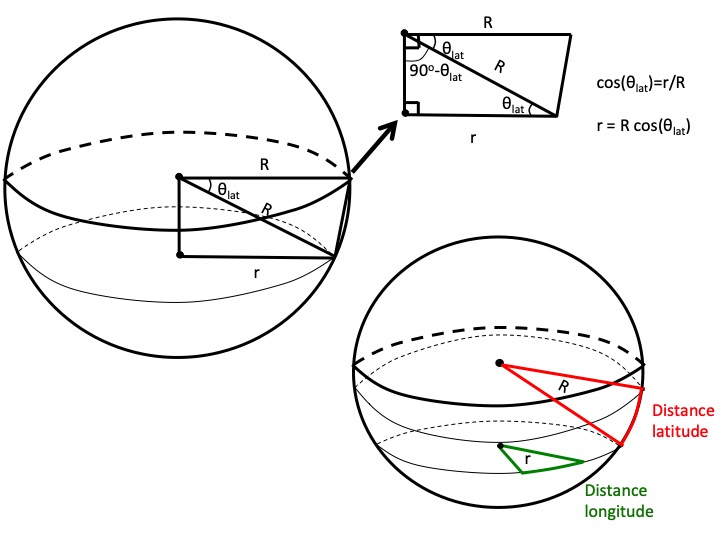

Find a grid cell close to the equator and calculate its size by modifying the following code. 



In [ ]:
# Find cell close at the equator
lonEq = (np.abs(lonts - 100)).argmin()
latEq = (np.abs(latts - 0)).argmin()

# Define Earth's radius in km
R = 6378;

# Calculate the arc length using the distance in degrees between two grid cells 
# and the Earth's radius

# The location of the boundaries of the cells are in teh variables latts_bnds 
# and lonts_bnds
with nc4.Dataset('grid_spec_mk3l_128_112_21_v2.nc', mode='r') as ncfid:
  lonts_bnds   = ncfid.variables['lonts_bnds'][:]
  latts_bnds   = ncfid.variables['latts_bnds'][:]

# Latitude
# Calculate the distance from one side of the grid cell to the next;
# Remember that lonts and latts give the location at the centre of the cells
dthetaLat = latts_bnds[1,latEq]-latts_bnds[0,latEq]
distLat = (dthetaLat/360)*2*np.pi*R

# Longitude
# Calculate the distance from one side of the grid cell to the next
dthetaLon = lonts_bnds[1,lonEq]-lonts_bnds[0,lonEq]
distLon = (dthetaLon/360)*2*np.pi*R*np.cos(np.deg2rad(latts[latEq]))

print("Meridional length of a grid cell at the equator : ",distLat,"km")
print("Zonal length of a grid cell at the equator : ",distLon,"km")



Meridional length of a grid cell at the equator :  177.31233040495977 km
Zonal length of a grid cell at the equator :  313.0490970004974 km


Now, repeat the previous code, but take a grid cell at the same longitude, but closer to the pole.

In [ ]:
# Write your code here

# Find cell closer to the pole
lonP = (np.abs(lonts - 100)).argmin()
latP = (np.abs(latts - 70)).argmin()

# Define Earth's radius in km
R = 6378

# Calculate the arc length using the distance in degrees between two grid cells 
# and the Earth's radius

# Latitude
# Calculate the distance from one side of the grid cell to the next;
# Remember that lonts and latts give the location at the centre of the cells
dthetaLat = latts_bnds[1,latP]-latts_bnds[0,latP]
distLat = (dthetaLat/360)*2*np.pi*R

# Longitude
# Calculate the distance from one side of the grid cell to the next
dthetaLon = lonts_bnds[1,lonP]-lonts_bnds[0,lonP]
distLon = (dthetaLon/360)*2*np.pi*R*np.cos(np.deg2rad(latts[latP]))

print("Meridional length of a grid cell near the pole : ",distLat,"km")
print("Zonal length of a grid cell near the pole : ",distLon,"km")

Meridional length of a grid cell near the pole :  177.26832608741674 km
Zonal length of a grid cell near the pole :  110.7366116242499 km


Repeat the same code again, but for a grid cell near the equator with a different longitude.

In [ ]:
# Write your code here
# Find cell close at the equator
lonEq = (np.abs(lonts - 200)).argmin()
latEq = (np.abs(latts - 0)).argmin()

# Define Earth's radius in km
R = 6378

# Calculate the arc length using the distance in degrees between two grid cells 
# and the Earth's radius

# The location of the boundaries of the cells are in teh variables latts_bnds 
# and lonts_bnds
with nc4.Dataset('grid_spec_mk3l_128_112_21_v2.nc', mode='r') as ncfid:
  lonts_bnds   = ncfid.variables['lonts_bnds'][:]
  latts_bnds   = ncfid.variables['latts_bnds'][:]

# Latitude
# Calculate the distance from one side of the grid cell to the next;
# Remember that lonts and latts give the location at the centre of the cells
dthetaLat = latts_bnds[1,latEq]-latts_bnds[0,latEq]
distLat = (dthetaLat/360)*2*np.pi*R

# Longitude
# Calculate the distance from one side of the grid cell to the next
dthetaLon = lonts_bnds[1,lonEq]-lonts_bnds[0,lonEq]
distLon = (dthetaLon/360)*2*np.pi*R*np.cos(np.deg2rad(latts[latEq]))

print("Meridional length of a grid cell at the equator : ",distLat,"km")
print("Zonal length of a grid cell at the equator : ",distLon,"km")


Meridional length of a grid cell at the equator :  177.31233040495977
Zonal length of a grid cell at the equator :  313.0490970004974


---------
#### Q1. How does the size of the grid cells vary and why?
#### Q2. Why did the grid cell appeared to have the same size on the previous plot?
---------

Let's see the grid on a sphere to put the grid cells' size into perspective. Simply run the following code to visualize the grid.

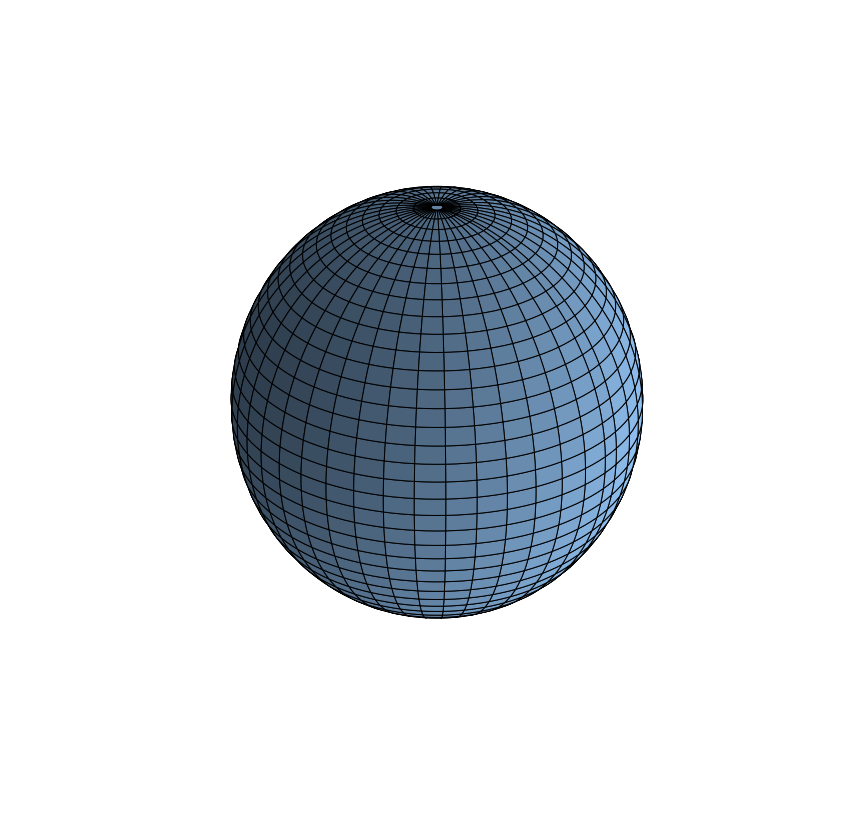

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15, 15))
ax = plt.axes(projection='3d')
ax.set_axis_off()

# Create a sphere with the Earth's radius
R = 6378

# Plot grid using loops to trace each line
# Loop the longitude for plotting
lonts1 = np.ones(len(lonts)+1)
lonts1[0:len(lonts)]=lonts
lonts1[len(lonts)] = 360+lonts[0]

# Create 2D matrices for the lat, lon and the radius in a x,y,z coordinate system
# (Convert from spherical coordinates)
latm, lonm = np.meshgrid(latts, lonts1)
xx = R*np.sin(np.deg2rad(90-latm))*np.cos(np.deg2rad(lonm))
yy = R*np.sin(np.deg2rad(90-latm))*np.sin(np.deg2rad(lonm))
zz = np.tile(R*np.cos(np.deg2rad(90-latts)), (len(lonts1),1))

ax.plot_surface(xx,yy,zz,color=(0.6,0.8,1),edgecolor=(0,0,0))


plt.show()

By plotting the grid on a three dimensional surface, we can clearly see the variations in the grid spacing.

#### Grid in depth
Using the code above, choose a grid cell near the equator and compare its sides' dimensions at the ocean surface and at the bottom of the ocean.

In [ ]:
# Find cell close at the equator
lonEq = (np.abs(lonts - 200)).argmin()
latEq = (np.abs(latts - 0)).argmin()

# Define Earth's radius in km
R = 6378

# Get the depth at the top and bottom of the cell
with nc4.Dataset('grid_spec_mk3l_128_112_21_v2.nc', mode='r') as ncfid:
  zts_bnds   = ncfid.variables['zts_bnds'][:]

#####################################
# Calculate for the surface grid cell

# Subsract depth of the surface cell to the Earth's radius (in km)
Rp = R-(zts_bnds[0,0]/1000)

# Latitude
# Calculate the distance from one side of the grid cell to the next;
# Remember that lonts and latts give the location at the centre of the cells
dthetaLat = latts_bnds[1,latEq]-latts_bnds[0,latEq]
distLat = (dthetaLat/360)*2*np.pi*Rp

# Longitude
# Calculate the distance from one side of the grid cell to the next
dthetaLon = lonts_bnds[1,lonEq]-lonts_bnds[0,lonEq]
distLon = (dthetaLon/360)*2*np.pi*Rp*np.cos(np.deg2rad(latts[latEq]))

print("Meridional length of a grid cell at the surface : ",distLat)
print("Zonal length of a grid cell at the surface : ",distLon)

#####################################
# Calculate for the bottom grid cell

# Write your code here

# Subsract depth of the surface cell to the Earth's radius (in km)
Rp = R-(zts_bnds[1,-1]/1000)

# Latitude
# Calculate the distance from one side of the grid cell to the next;
# Remember that lonts and latts give the location at the centre of the cells
dthetaLat = latts_bnds[1,latEq]-latts_bnds[0,latEq]
distLat = (dthetaLat/360)*2*np.pi*Rp

# Longitude
# Calculate the distance from one side of the grid cell to the next
dthetaLon = lonts_bnds[1,lonEq]-lonts_bnds[0,lonEq]
distLon = (dthetaLon/360)*2*np.pi*Rp*np.cos(np.deg2rad(latts[latEq]))

print("Meridional length of a grid cell at the bottom : ",distLat,"km")
print("Zonal length of a grid cell at the bottom : ",distLon,"km")


Meridional length of a grid cell at the surface :  177.31233040495977
Zonal length of a grid cell at the surface :  313.0490970004974
Meridional length of a grid cell at the bottom :  177.1844475702368 km
Zonal length of a grid cell at the bottom :  312.82331684273595 km


---------
#### Q3. Is there a big difference?
#### Q4. Why is it different?
#### Q5. Do you think this difference matters? In which situations could it matter more?

---


---------

Compare the surface and bottom cells surface area using an area of 60 by 60 grid cells. For this, we need to use a loop to sum the surface area of the cells. For the purpose of this exercise, we will approximate the cells as being trapeze shaped. The equation for the surface area of a trapeze is 
$$A = \frac{(b_{1}+b_{2})h}{2}$$
where $b_{1}$ and $b_{2}$ and the width at the base and the top of the trapeze and h is the height.

In [ ]:
# Find cell close at the equator
lonEq = (np.abs(lonts - 200)).argmin()
latEq = (np.abs(latts - 0)).argmin()

# Define Earth's radius in km
R = 6378

#####################################
# Calculate for the surface grid cell

# Subsract depth of the surface cell to the Earth's radius (in km)
Rp = R-(zts_bnds[0,0]/1000)

# Calculate the distance from one side of the grid cell to the next;
# Remember that lonts and latts give the location at the centre of the cells
area = 0
for lati in range(latEq-29,latEq+30):
  for loni in range(lonEq-29,lonEq+30):
    dthetaLat = latts_bnds[1,lati]-latts_bnds[0,lati]
    h = (dthetaLat/360)*2*np.pi*Rp
    dthetaLon = lonts_bnds[1,loni]-lonts_bnds[0,loni]
    b1 = (dthetaLon/360)*2*np.pi*Rp*np.cos(np.deg2rad(latts_bnds[1,lati]))
    b2 = (dthetaLon/360)*2*np.pi*Rp*np.cos(np.deg2rad(latts_bnds[0,lati]))
    # complete code
    area = area + (b1+b2)*h/2

print("Area at the surface : ",area,"km^2")

#####################################
# Calculate for the bottom grid cell

# Write code here

# Subsract depth of the surface cell to the Earth's radius (in km)
Rp = R-(zts_bnds[1,-1]/1000)

# Calculate the distance from one side of the grid cell to the next;
# Remember that lonts and latts give the location at the centre of the cells
area = 0
for lati in range(latEq-29,latEq+30):
  for loni in range(lonEq-29,lonEq+30):
    dthetaLat = latts_bnds[1,lati]-latts_bnds[0,lati]
    h = (dthetaLat/360)*2*np.pi*Rp
    dthetaLon = lonts_bnds[1,loni]-lonts_bnds[0,loni]
    b1 = (dthetaLon/360)*2*np.pi*Rp*np.cos(np.deg2rad(latts_bnds[1,lati]))
    b2 = (dthetaLon/360)*2*np.pi*Rp*np.cos(np.deg2rad(latts_bnds[0,lati]))
    # complete code
    area = area + (b1+b2)*h/2

print("Area at the bottom : ",area,"km^2")


Area at the surface :  172265742.71577924 km^2
Area at the bottom :  172017346.14713657 km^2


---------
#### Q6. Is the surface area scalable, i.e. if you use 60 x the width and 60 x the height of one grid cell, to approximate a surface area, would you obtain the same result? Why?
#### Q7. At this scale, does the difference between the surface and bottom cells scale matter?
---------

Let's see a 3D grid cell to visualize this difference. Simply run the following code.

On the left I show a surface grid cell and on the right an exagerated version that spans 60 by 30 grid cells and that would extend in depth to about 1/3 the Eart's radius. This is to better show the fanning effect from the sphere's centre. N.B. Axes are not to scale.

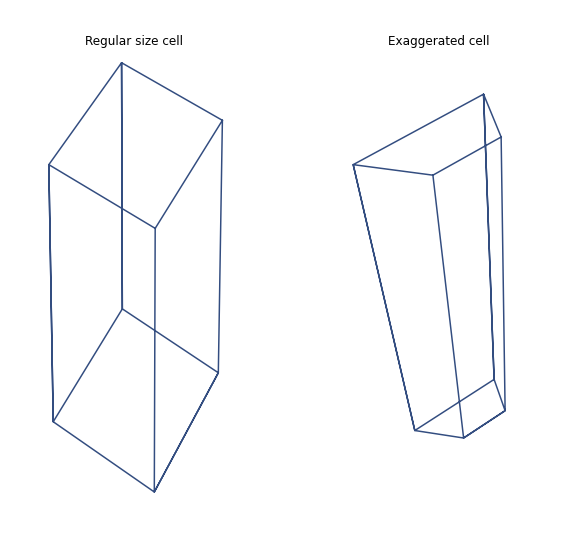

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(121, projection='3d')
ax1.set_axis_off()
ax2 = fig.add_subplot(122, projection='3d')
ax2.set_axis_off()

# Create a sphere with the Earth's radius
R = 6378

# Find cell close at subpolar latitudes
lonSp = (np.abs(lonts - 180)).argmin()
latSp = (np.abs(latts - 35)).argmin()

# Plot one grid cell, finding it's location in cartesian coordinates converted 
# from spherical coordinates

# how many cells to show x by y
cellsx = 60
cellsy = 30

# Initialize matrices
lat1 = np.zeros(16)
lon1 = np.zeros(16)
lat2 = np.zeros(16)
lon2 = np.zeros(16)
xx1 = np.zeros(16)
yy1 = np.zeros(16)
zz1 = np.zeros(16)
xx2 = np.zeros(16)
yy2 = np.zeros(16)
zz2 = np.zeros(16)

# Depth
Rtop = R-zts_bnds[0,0]/1000
Rbot1 = R-zts_bnds[1,0]/1000
Rbot2 = R-zts_bnds[1,20]/2

# Draw the cell and repeat for a few cells across
for n in range(0,5):
  lat1[n] = latts_bnds[1,latSp]
  lat2[n] = latts_bnds[1,latSp+np.ceil(cellsy/2).astype(int)]
for n in range(5,11):
  lat1[n] = latts_bnds[0,latSp]
  lat2[n] = latts_bnds[0,latSp-np.floor(cellsy/2).astype(int)]
for n in range(11,13):
  lat1[n] = latts_bnds[1,latSp]
  lat2[n] = latts_bnds[1,latSp+np.ceil(cellsy/2).astype(int)]
for n in range(13,15):
  lat1[n] = latts_bnds[0,latSp]
  lat2[n] = latts_bnds[0,latSp-np.floor(cellsy/2).astype(int)]
lat1[15] = latts_bnds[1,latSp]
lat2[15] = latts_bnds[1,latSp+np.ceil(cellsy/2).astype(int)]

lon1[0] = lonts_bnds[0,lonSp]
lon2[0] = lonts_bnds[0,lonSp-np.floor(cellsx/2).astype(int)]
for n in range(1,3):
  lon1[n] = lonts_bnds[1,lonSp]
  lon2[n] = lonts_bnds[1,lonSp+np.ceil(cellsx/2).astype(int)]
for n in range(3,6):
  lon1[n] = lonts_bnds[0,lonSp]
  lon2[n] = lonts_bnds[0,lonSp-np.floor(cellsx/2).astype(int)]
for n in range(6,8):
  lon1[n] = lonts_bnds[1,lonSp]
  lon2[n] = lonts_bnds[1,lonSp+np.ceil(cellsx/2).astype(int)]
for n in range(8,12):
  lon1[n] = lonts_bnds[0,lonSp]
  lon2[n] = lonts_bnds[0,lonSp-np.floor(cellsx/2).astype(int)]
for n in range(12,16):
  lon1[n] = lonts_bnds[1,lonSp]
  lon2[n] = lonts_bnds[1,lonSp+np.ceil(cellsx/2).astype(int)]

# from spherical to cartesian
for n in range(0,2):
  xx1[n] = Rtop*np.sin(np.deg2rad(90-lat1[n]))*np.cos(np.deg2rad(lon1[n]))
  yy1[n] = Rtop*np.sin(np.deg2rad(90-lat1[n]))*np.sin(np.deg2rad(lon1[n]))
  zz1[n] = Rtop*np.cos(np.deg2rad(90-latts[latSp]))
  xx2[n] = Rtop*np.sin(np.deg2rad(90-lat2[n]))*np.cos(np.deg2rad(lon2[n]))
  yy2[n] = Rtop*np.sin(np.deg2rad(90-lat2[n]))*np.sin(np.deg2rad(lon2[n]))
  zz2[n] = Rtop*np.cos(np.deg2rad(90-latts[latSp]))
for n in range(2,4):
  xx1[n] = Rbot1*np.sin(np.deg2rad(90-lat1[n]))*np.cos(np.deg2rad(lon1[n]))
  yy1[n] = Rbot1*np.sin(np.deg2rad(90-lat1[n]))*np.sin(np.deg2rad(lon1[n]))
  zz1[n] = Rbot1*np.cos(np.deg2rad(90-latts[latSp]))
  xx2[n] = Rbot2*np.sin(np.deg2rad(90-lat2[n]))*np.cos(np.deg2rad(lon2[n]))
  yy2[n] = Rbot2*np.sin(np.deg2rad(90-lat2[n]))*np.sin(np.deg2rad(lon2[n]))
  zz2[n] = Rbot2*np.cos(np.deg2rad(90-latts[latSp]))
for n in range(4,7):
  xx1[n] = Rtop*np.sin(np.deg2rad(90-lat1[n]))*np.cos(np.deg2rad(lon1[n]))
  yy1[n] = Rtop*np.sin(np.deg2rad(90-lat1[n]))*np.sin(np.deg2rad(lon1[n]))
  zz1[n] = Rtop*np.cos(np.deg2rad(90-latts[latSp]))
  xx2[n] = Rtop*np.sin(np.deg2rad(90-lat2[n]))*np.cos(np.deg2rad(lon2[n]))
  yy2[n] = Rtop*np.sin(np.deg2rad(90-lat2[n]))*np.sin(np.deg2rad(lon2[n]))
  zz2[n] = Rtop*np.cos(np.deg2rad(90-latts[latSp]))
for n in range(7,9):
  xx1[n] = Rbot1*np.sin(np.deg2rad(90-lat1[n]))*np.cos(np.deg2rad(lon1[n]))
  yy1[n] = Rbot1*np.sin(np.deg2rad(90-lat1[n]))*np.sin(np.deg2rad(lon1[n]))
  zz1[n] = Rbot1*np.cos(np.deg2rad(90-latts[latSp]))
  xx2[n] = Rbot2*np.sin(np.deg2rad(90-lat2[n]))*np.cos(np.deg2rad(lon2[n]))
  yy2[n] = Rbot2*np.sin(np.deg2rad(90-lat2[n]))*np.sin(np.deg2rad(lon2[n]))
  zz2[n] = Rbot2*np.cos(np.deg2rad(90-latts[latSp]))
xx1[9] = Rtop*np.sin(np.deg2rad(90-lat1[9]))*np.cos(np.deg2rad(lon1[9]))
yy1[9] = Rtop*np.sin(np.deg2rad(90-lat1[9]))*np.sin(np.deg2rad(lon1[9]))
zz1[9] = Rtop*np.cos(np.deg2rad(90-latts[latSp]))
xx2[9] = Rtop*np.sin(np.deg2rad(90-lat2[9]))*np.cos(np.deg2rad(lon2[9]))
yy2[9] = Rtop*np.sin(np.deg2rad(90-lat2[9]))*np.sin(np.deg2rad(lon2[9]))
zz2[9] = Rtop*np.cos(np.deg2rad(90-latts[latSp]))
for n in range(10,14):
  xx1[n] = Rbot1*np.sin(np.deg2rad(90-lat1[n]))*np.cos(np.deg2rad(lon1[n]))
  yy1[n] = Rbot1*np.sin(np.deg2rad(90-lat1[n]))*np.sin(np.deg2rad(lon1[n]))
  zz1[n] = Rbot1*np.cos(np.deg2rad(90-latts[latSp]))
  xx2[n] = Rbot2*np.sin(np.deg2rad(90-lat2[n]))*np.cos(np.deg2rad(lon2[n]))
  yy2[n] = Rbot2*np.sin(np.deg2rad(90-lat2[n]))*np.sin(np.deg2rad(lon2[n]))
  zz2[n] = Rbot2*np.cos(np.deg2rad(90-latts[latSp]))
for n in range(14,16):
  xx1[n] = Rtop*np.sin(np.deg2rad(90-lat1[n]))*np.cos(np.deg2rad(lon1[n]))
  yy1[n] = Rtop*np.sin(np.deg2rad(90-lat1[n]))*np.sin(np.deg2rad(lon1[n]))
  zz1[n] = Rtop*np.cos(np.deg2rad(90-latts[latSp]))
  xx2[n] = Rtop*np.sin(np.deg2rad(90-lat2[n]))*np.cos(np.deg2rad(lon2[n]))
  yy2[n] = Rtop*np.sin(np.deg2rad(90-lat2[n]))*np.sin(np.deg2rad(lon2[n]))
  zz2[n] = Rtop*np.cos(np.deg2rad(90-latts[latSp]))

ax1.plot(xx1,yy1,zz1,color=(0.2,0.3,0.5))
ax1.set_title('Regular size cell')
ax2.plot(xx2,yy2,zz2,color=(0.2,0.3,0.5))
ax2.set_title('Exaggerated cell')
  
plt.show()



---------
#### Q8. Can you tell the axes directions (i.e. which direction would be the pole, the equator and the bottom of the ocean) on the previous plot?
---------

Models usually comes with a netcdf file that contains the grid that contains the dimensions for each grid cell. Let's compare the area we calculated assuming trapeze shaped cells with the area provided by the model grid specifications.


In [ ]:
# Choose the same specifications to select the same cells than in your code for 
# the area of 60 by 60 cells.

# Use this code for the cells surface area of the mass quantity cells (ts)
with nc4.Dataset('grid_spec_mk3l_128_112_21_v2.nc', mode='r') as ncfid:
  dats = ncfid.variables['dats'][:]

areaFile = np.sum(dats[latEq-29:latEq+30,lonEq-29:lonEq+30])
print("Area summed from the file : ",areaFile,"km^2")

Area summed from the file :  171910762041539.75 km^2


Note that the surface area provided here is only a function of latitude and longitude. Some models provide the cell's area in a tri-dimensional matrix. For most application, we only need the area at the surface for the flux entering/leaving the ocean. In any case, grid cells are very thin compared to the Earth's radius, so the difference in cells' area along depth is small enough to be neglected.

####Grid summary: 

It is important to be aware and mindful of the tridimensional shape of the grid cells and location of the velocities and tracers (mass quantities) within them when performing calculations. Also, most ocean models, including this one, have partial cells at the bottom of the ocean. That means that the vertical thickness of the grid cells vary spatially, the bottom cell will have a varying thickness (e.g. near the coast there might be only 3 valid vertical cells and the third one will have a different thickness). This might impact volume dependant calculations, such as heat content; or cross-sectional transport. 


## 3. Streamfunction
Streamfunction are lines that follows the flow, i.e. always parallel to the flow. For a circular flow, the streamfunctions are closed lines that circles around where the circulation passes from one direction to the other. For an horizontal circulation, the streamfunctions, $\psi$ are defines such that 

$$u = \frac{{\text{d}}\psi}{{\text{d}}y} \qquad {\text{and}} \qquad v = \frac{-{\text{d}}\psi}{{\text{d}}x}$$ 

where u and v are respectively the east-west (x-axis) and south-north (y-axis) velocities. The flow is not divergent, so by definition $\frac{du}{dx}+\frac{dv}{dy} = 0$, therefore

$$\psi = \int_{y0}^{y}u(x,y) dy - \int_{x_0}^{x}v(x,y_0) dx$$

Where the integral is cumulative from the coast until the location calculated for (x,y) when calculated from discretized model grid cells.

For an overturning circulation (x-z axis), we change the y-axis for the vertical axis, z, with w defined as the upward velocity, then the streamfunctions are

$$\psi = \int_{z0}^{z}v(x,z) dz - \int_{y_0}^{y}w(x,z_0) dy$$

where u is either the east-west or the south-north velocity. As per usual, we assume the vertical velocity as negligeable compared to the horizontal velocities and we want to look at the full flow across the ocean by integrating zonally, so for the full ocean wide meridional overturning, we are left with: 

$$\psi = \int_{z0}^{z} \int v dxdz$$

The integral from $z_{0}$ to $z$ is cumulative from the ocean surface.







### 3.1 Global overturning streamfunctions

The following code imports the essential libraries and imports the Control experiment ocean data.

In [ ]:
# Numerics
import numpy as np

# Plotting
import matplotlib.pyplot as plt

# Install the netcdf library
!pip install netcdf4

# import library
import netCDF4 as nc4

# plot figures in Colaboratory notebook
%matplotlib inline

# Import the control experiment ocean data
!gdown --id 13PdbpwZg3uJcnguOkF-CQVvh4NTxXeSF


     |████████████████████████████████| 4.7MB 5.5MB/s 
     |████████████████████████████████| 317kB 38.3MB/s 
Downloading...
From: https://drive.google.com/uc?id=13PdbpwZg3uJcnguOkF-CQVvh4NTxXeSF
To: /content/oce.Ctl.nc
728MB [00:07, 103MB/s]


Run the following code to see which variables are available in the ocean data file.

In [ ]:
f = nc4.Dataset('oce.Ctl.nc','r')
print(f)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    dimensions(sizes): lonts(128), lonuv(128), latts(112), latuv(112), zts(21), zuv(21), year(100)
    variables(dimensions): float64 lonts(lonts), float64 lonuv(lonuv), float64 latts(latts), float64 latuv(latuv), float64 zts(zts), float64 zuv(zuv), float32 year(year), float32 relyr(year), float32 temp(year, zts, latts, lonts), float32 sal(year, zts, latts, lonts), float32 rho(year, zts, latts, lonts), float32 u(year, zts, latuv, lonuv), float32 v(year, zts, latuv, lonuv), float32 w(year, zuv, latts, lonts), float32 cdepthm(year, latts, lonts)
    groups: 


In order to calculate the streamfunction, 
$$\psi = \int_{z0}^{z} \int v dxdz$$
we need the meridional velocity, $v$, the width of the grid cells, $dx$ and the thickness of the grid cells, $dz$. The following code imports those variables and show you how to do the integrals, remember that the depth integral is cumulative.

The streamfunction, $\psi$ has units of $m^3/s$, so a volume transport. In oceanography, we usually scale those units into Sverdrups:
$$1 Sv = 10^6 m^3/s$$ 

N.B.: I choose to load the grid cells volume at the "u,v" location. This is simply because I do not have a 3D representation of the cell's thickness to calculate the cells' meridional face area considering partial cells at the bottom of the ocean. So, I use instead the cells' volume and divide by their length to get the cell's face area.

Downloading...
From: https://drive.google.com/uc?id=169cOKFptAEpmhCt1j54iYjgTEY_y_A_e
To: /content/grid_spec_mk3l_128_112_21_v2.nc
5.06MB [00:00, 161MB/s]


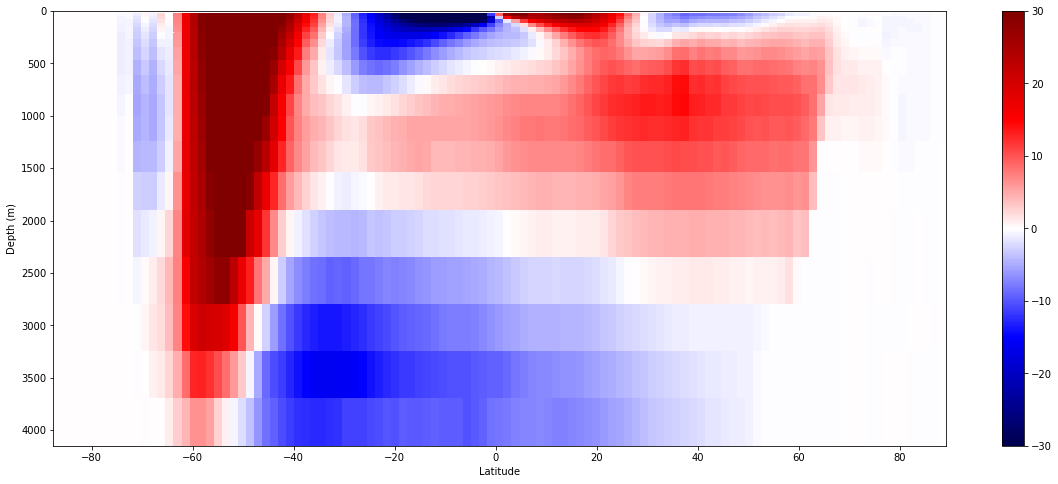

In [ ]:
with nc4.Dataset('oce.Ctl.nc', mode='r') as ncfid:
  v = ncfid.variables['v'][:] #4D: years, depth, lat, lon
  # We need the depth and latitude at the "u,v" location of the grid cells, 
  # because we use "v" for the equation
  zuv = ncfid.variables['zuv'][:]
  latuv = ncfid.variables['latuv'][:]

# For dx and dz, we need the grid specification file
!gdown --id 169cOKFptAEpmhCt1j54iYjgTEY_y_A_e
with nc4.Dataset('grid_spec_mk3l_128_112_21_v2.nc', mode='r') as ncfid: 
  # Loading the cells' volume, centered on the velocity quantities, uv. This is 
  # a "trick" to get the face area because we don't have the tridimensional 
  # cells' thickness, which would be varying with the partial cells bathymetry.
  dvuv = ncfid.variables['dvuv'][:]
  latuv_bnds = ncfid.variables['latuv_bnds'][:]

# Earth's radius
R = 6378*1000 # in meters

## Calculate dxdz (cells face area)
# dxdz = dV/dy
# Calculate dy
dthetaLat = latuv_bnds[1,:]-latuv_bnds[0,:] # Complete code
dy = (dthetaLat/360)*2*np.pi*R

# Initialize area matrix
dA = np.zeros((np.shape(dvuv)))

# Calculate dxdz (dA)
for zi in range(0,np.size(dvuv,0)):
  for loni in range(0,np.size(dvuv,2)):
    dA[zi,:,loni] = dvuv[zi,:,loni]/dy[:]

## Calculate overturning streamfunction
# Initialize matrix
psi = np.zeros((np.size(v,0),np.size(v,1),np.size(v,2)))
# Sum cumulatively vertically from the surface and integrate zonally
# Note: we can directly sum horizontally because the grid cells are of equal 
# width, their size only varies with latitude.
for yeari in range(0,np.size(v,0)):
  for zi in range(0,np.size(v,1)):
    psi[yeari,zi,:] = np.nansum(np.nansum(v[yeari,0:zi,:,:]*dA[0:zi,:,:],2),0)

# Convert units to Sverdrups
psi = psi/(1e6)

# Plot the overturning streamfunction
fig = plt.figure(figsize=(20, 8))
ax = plt.axes()
plt.gca().invert_yaxis() # make depth increase downwards
c = ax.pcolormesh(latuv, zuv, psi[0,:,:], cmap='seismic',vmin=-30, vmax=30)
ax.set_ylabel('Depth (m)')
ax.set_xlabel('Latitude')
fig.colorbar(c)
plt.show()

---------
#### Q9. At approximately what depth is the maximum meridional overturning transport?
#### Q10. Concretely, what is happening with the overturning circulation at the depth of maximum transport?
#### Q11. What is happenning between 60S and 40S?
---------

Before looking at the experiments' results, we have to make sure the model doesn't drift too much for the quantity we are looking at. To do so, substract the overturning streamfunction of the first year of the control run from the last year and see how much it changed in the control experiment.

N.B. Because we are not using true years, but normal years in the model, we can just substract the first year to the last year. When looking at true years, there's some variability within each year that has to be taken into consideration, so we usually average the last 10 years and substract the average of the first 10 years to it. Here this is not necessary.

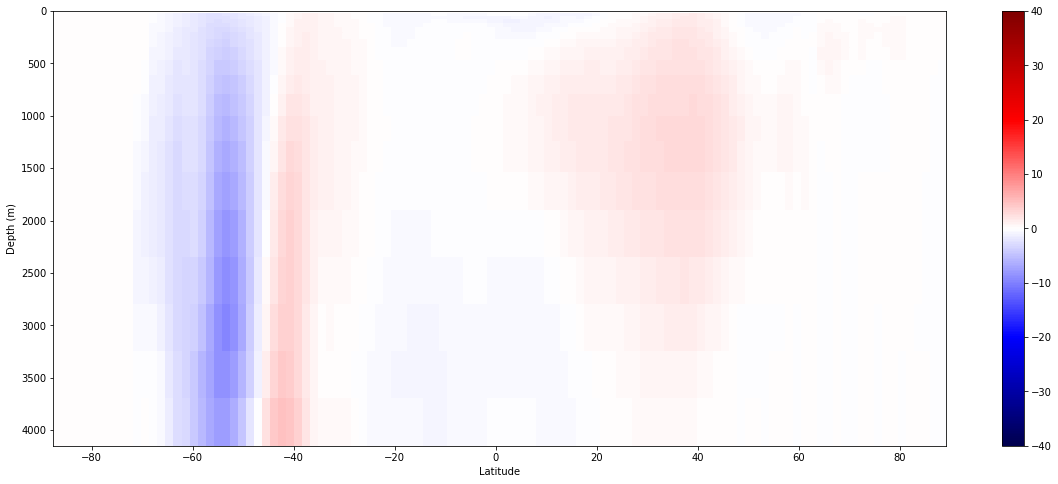

In [ ]:
# Repeat previous code for the last year of the Control experiment and substract
# the first year to it before plotting.

# Your code here

# Plot the overturning streamfunction
fig = plt.figure(figsize=(20, 8))
ax = plt.axes()
plt.gca().invert_yaxis() # make depth increase downwards
c = ax.pcolormesh(latuv, zuv, psi[99,:,:]-psi[0,:,:], cmap='seismic',vmin=-40, vmax=40)
ax.set_ylabel('Depth (m)')
ax.set_xlabel('Latitude')
fig.colorbar(c)
plt.show()

---------
#### Q12. How would you know if the model drift is reasonable for the purpose of the experimental analysis?
#### Q13. Do you think that here the model drift is reasonable?
---------


### 3.2 Atlantic Meridional Overturning Circulation 

For the Atlantic Meridional Overturning Circulation, you only want to look at the streamfunctions in the Atlantic Ocean, so you need to integrate velocities only within the Atlantic. To do so, you can use the ocean basin mask provided to select data within the Atlantic only.






In [ ]:
# import ocean basin masks, bsnmask.nc
!gdown --id 1koaaF-idgyi1sVcGoRhw_75QiiGXCc8y

Downloading...
From: https://drive.google.com/uc?id=1koaaF-idgyi1sVcGoRhw_75QiiGXCc8y
To: /content/bsnmask.nc
100% 59.0k/59.0k [00:00<00:00, 42.4MB/s]


Most models have a file that contains masks for the Pacific, Indian and Atlantic Oceans. 

Look at the content of the bsnmask.nc file.

In [ ]:
# Content of the bsnmask.nc file
f = nc4.Dataset('bsnmask.nc','r')
print(f)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    title: Ocean basin masks for the 128x112 Mk3L ocean model grid
    history: Generated by Steven Phipps on 18 April 2009 using make_bsnmask_mk3l_128_112_1p5_ts_int.f90
    dimensions(sizes): lonts(128), latts(112)
    variables(dimensions): float32 lonts(lonts), float32 latts(latts), int32 mask(latts, lonts)
    groups: 


Take the variable that contains the mask and plot it.

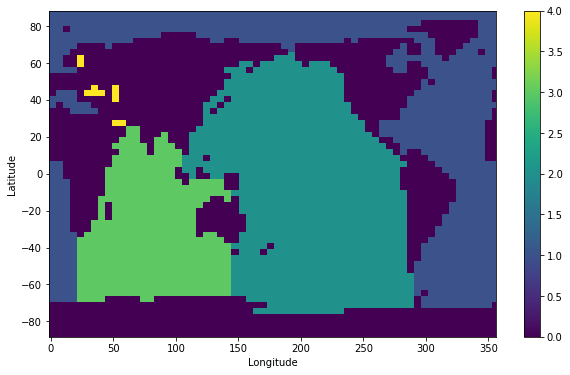

In [ ]:
# Plot the basin mask
with nc4.Dataset('bsnmask.nc', mode='r') as ncfid: 
  mask = ncfid.variables['mask'][:]
  lonts = ncfid.variables['lonts'][:]
  latts = ncfid.variables['latts'][:]

fig = plt.figure(figsize=(10, 6))
ax = plt.axes()
c = ax.pcolormesh(lonts, latts, mask, cmap='viridis')
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
fig.colorbar(c)
plt.show()

---------
#### Q14. On which part of the cell is the basin mask identified?
#### Q15. Does the inclusion of the Gulf of Mexico in the Atlantic Ocean or not might affect the calculation of the AMOC? Why?
---------

Plot the AMOC like you did for the global Meridional Overturning Circulation.

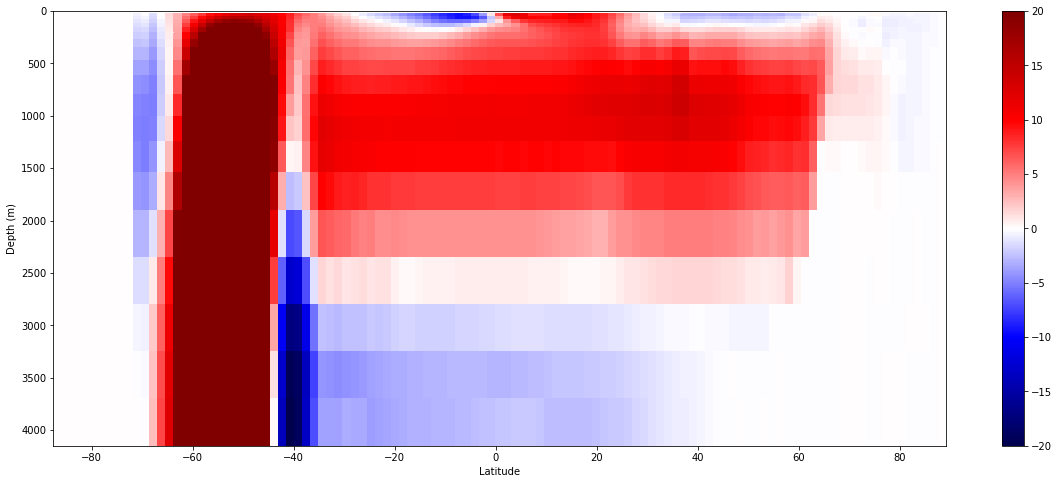

In [ ]:
# Clue: to select only cells that are within the Atlantic Ocean, you can mask
# the other cells in the matrices by converting to nans using this functions:
# matrix[np.where(mask!=x)] = np.nan
# != means "not equal to"

with nc4.Dataset('oce.Ctl.nc', mode='r') as ncfid:
  v = ncfid.variables['v'][:]

## Calculate overturning streamfunction
# Initialize matrix
psi = np.zeros((np.size(v,0),np.size(v,1),np.size(v,2)))
# Sum cumulatively vertically from the surface and integrate zonally
# Note: we can directly sum horizontally because the grid cells are of equal 
# width, their size only varies with latitude.
for yeari in range(0,np.size(v,0)):
  for zi in range(0,np.size(v,1)):
    vtemp = v[yeari,zi,:,:]
    vtemp[np.where(mask!=1)] = np.nan
    v[yeari,zi,:,:] = vtemp
    psi[yeari,zi,:] = np.nansum(np.nansum(v[yeari,0:zi,:,:]*dA[0:zi,:,:],2),0)

# Convert units to Sverdrups
psi = psi/(1e6)

# Plot the overturning streamfunction
fig = plt.figure(figsize=(20, 8))
ax = plt.axes()
plt.gca().invert_yaxis() # make depth increase downwards
c = ax.pcolormesh(latuv, zuv, psi[0,:,:], cmap='seismic',vmin=-20, vmax=20)
ax.set_ylabel('Depth (m)')
ax.set_xlabel('Latitude')
fig.colorbar(c)
plt.show()


---------
#### Q16. What is the difference between the circulation above and under 2500m?
---------

Plot the model drift of the AMOC.

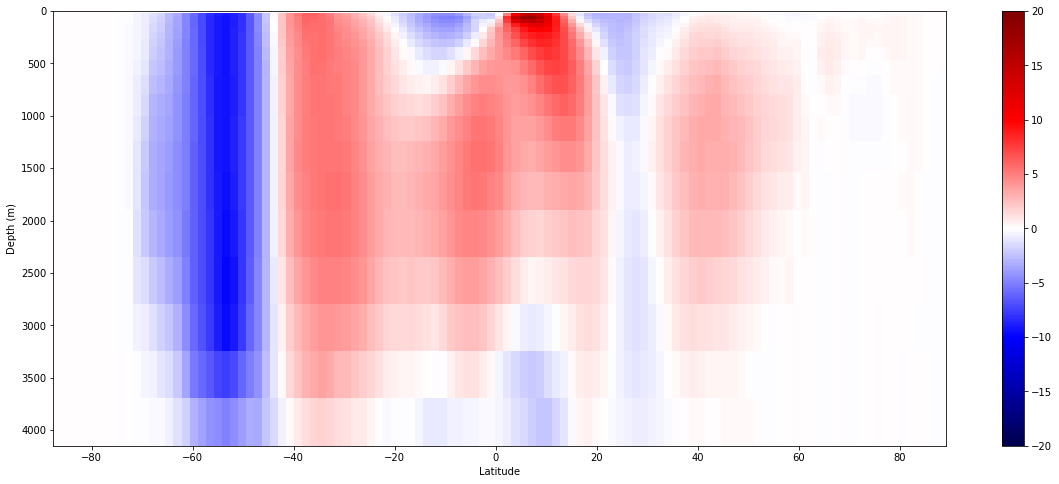

In [ ]:
# Year 100 minus Year 1 of the Control experiment for the AMOC

# Plot the overturning streamfunction
fig = plt.figure(figsize=(20, 8))
ax = plt.axes()
plt.gca().invert_yaxis() # make depth increase downwards
c = ax.pcolormesh(latuv, zuv, psi[99,:,:]-psi[0,:,:], cmap='seismic',vmin=-20, vmax=20)
ax.set_ylabel('Depth (m)')
ax.set_xlabel('Latitude')
fig.colorbar(c)
plt.show()

Now that we know how the model performs at reproducing the AMOC, we can investigate how it changes in our experiments.

Plot the difference in the AMOC at the end of the hoseG exerperiment compared to the Control experiment.

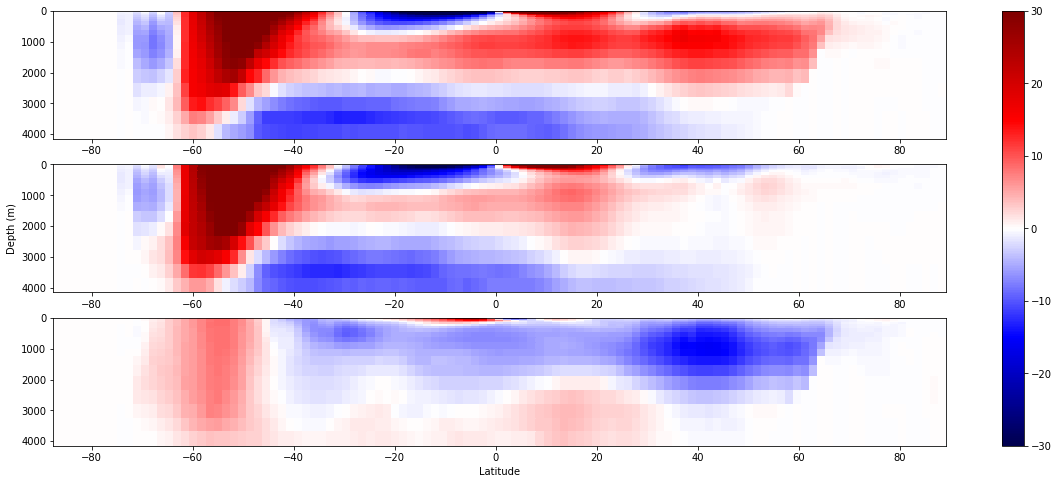

In [ ]:
# import the ocean data for the hoseG experimenta
#!gdown --id 1fdBE2Afm2xwpLQ5xVZ-zxE_XH9xGDIXv

with nc4.Dataset('oce.Ctl.nc', mode='r') as ncfid:
  vC = ncfid.variables['v'][:] #4D: years, depth, lat, lon
  # We need the depth and latitude at the "u,v" location of the grid cells, 
  # because we use "v" for the equation
  zuv = ncfid.variables['zuv'][:]
  latuv = ncfid.variables['latuv'][:]

with nc4.Dataset('oce.hoseG.nc', mode='r') as ncfid:
  vG = ncfid.variables['v'][:] #4D: years, depth, lat, lon

# For dx and dz, we need the grid specification file
with nc4.Dataset('grid_spec_mk3l_128_112_21_v2.nc', mode='r') as ncfid: 
  # Loading the cells' volume, centered on the velocity quantities, uv. This is 
  # a "trick" to get the face area because we don't have the tridimensional 
  # cells' thickness, which would be varying with the partial cells bathymetry.
  dvuv = ncfid.variables['dvuv'][:]
  latuv_bnds = ncfid.variables['latuv_bnds'][:]

# Earth's radius
R = 6378*1000 # in meters

## Calculate dxdz (cells face area)
# dxdz = dV/dy
# Calculate dy
dthetaLat = latuv_bnds[1,:]-latuv_bnds[0,:] # Complete code
dy = (dthetaLat/360)*2*np.pi*R

# Initialize area matrix
dA = np.zeros((np.shape(dvuv)))

# Calculate dxdz (dA)
for zi in range(0,np.size(dvuv,0)):
  for loni in range(0,np.size(dvuv,2)):
    dA[zi,:,loni] = dvuv[zi,:,loni]/dy[:]

## Calculate overturning streamfunction
# Initialize matrix
psiC = np.zeros((np.size(v,0),np.size(v,1),np.size(v,2)))
psiG = np.zeros((np.size(v,0),np.size(v,1),np.size(v,2)))
# Sum cumulatively vertically from the surface and integrate zonally
# Note: we can directly sum horizontally because the grid cells are of equal 
# width, their size only varies with latitude.
for yeari in range(0,np.size(v,0)):
  for zi in range(0,np.size(v,1)):
    psiC[yeari,zi,:] = np.nansum(np.nansum(vC[yeari,0:zi,:,:]*dA[0:zi,:,:],2),0)
    psiG[yeari,zi,:] = np.nansum(np.nansum(vG[yeari,0:zi,:,:]*dA[0:zi,:,:],2),0)

# Convert units to Sverdrups
psiC = psiC/(1e6)
psiG = psiG/(1e6)

# Plot the overturning streamfunction
fig, axs = plt.subplots(3, 1,figsize=(20, 8))

ax = axs[0]
c = ax.pcolormesh(latuv, zuv, psiC[99,:,:], cmap='seismic',vmin=-30, vmax=30)
ax.invert_yaxis() # make depth increase downwards

ax = axs[1]
c = ax.pcolormesh(latuv, zuv, psiG[99,:,:], cmap='seismic',vmin=-30, vmax=30)
ax.invert_yaxis() # make depth increase downwards
ax.set_ylabel('Depth (m)')

ax = axs[2]
c = ax.pcolormesh(latuv, zuv, psiG[99,:,:]-psiC[99,:,:], cmap='seismic',vmin=-30, vmax=30)
ax.invert_yaxis() # make depth increase downwards
ax.set_xlabel('Latitude')

fig.colorbar(c, ax=axs[:])
plt.show()


---------
#### Q17. What can you say about the effect of the melting of the Greenland icesheet on the AMOC?
#### Q18. Through which mechanism are these changes driven?
---------

### 3.3 AMOC strength

The Atlantic Overturning Circulation (AMOC) strength is defined as the maximum in the overturning streamfunction. 

---------
#### Q19. Where is the maximum strength of the overturning circulation, which overturning cell do you have to look at?
#### Q20. Through which mechanism are these changes driven?
---------

Complete the code below to find the maximum strength in the AMOC at the end of the experiments.

In [ ]:
# Get the streamfunctions for the control and hoseG experiments from the 
# previous plots
psiCend = psiC[99,:,:]
psiGend = psiG[99,:,:]

# Select the region where the AMOC overturning cell is
latMin = (np.abs(latuv - 30)).argmin()
latMax = (np.abs(latuv - 60)).argmin()

maxAMOCC = np.amax(psiCend[:,latMin:latMax])
maxAMOCG = np.amax(psiGend[:,latMin:latMax])

print('The maximum strength in the Control experiment at year 100 is',maxAMOCC)
print('The maximum strength in the hoseG experiment at year 100 is',maxAMOCG)

The maximum strength in the Control experiment at year 100 is 16.990671079405203
The maximum strength in the hoseG experiment at year 100 is 2.581914808755169


Plot the timeseries of the AMOC strength in the Control experiment and in the hoseG experiment.

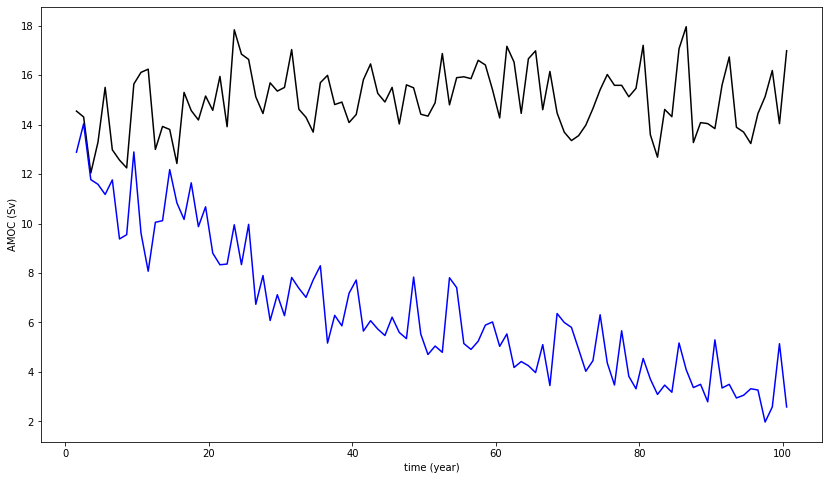

In [ ]:
# Plot the timeseries for the AMOC
del maxAMOCC
del maxAMOCG

# Initialize the matrices
maxAMOCC = np.zeros(np.size(psiC,0))
maxAMOCG = np.zeros(np.size(psiG,0))

with nc4.Dataset('oce.hoseG.nc', mode='r') as ncfid:
  year = ncfid.variables['year'][:]

for yeari in range(0,len(year)):
  maxAMOCC[yeari] = np.amax(psiC[yeari,:,latMin:latMax])
  maxAMOCG[yeari] = np.amax(psiG[yeari,:,latMin:latMax])

fig = plt.figure(figsize=(14,8))
plt.plot(year,maxAMOCC,color='k')
plt.plot(year,maxAMOCG,color='b')

plt.xlabel('Time (year)')
plt.ylabel('AMOC (Sv)')

plt.show()

---------
#### Q21. What can you say about how the AMOC changes with the melting of the Greenland icesheet?
---------

## 4. Heat transport

### 4.1 Meridional Heat Transport

### 4.2 Correlation between heat transport and AMOC strength

### 4.3 Effect on weather in Europe


# Extra: You can redo the sections 3 and 4 of the lab now adding the hoseA experiment. 

-------
#### Q22. What is the effect of the melting of the Antarctic icesheet on the overturning circulation?
#### Q23. How different is the effect of the melting of the Antarctic icesheet compared to the melting of the Greenland icesheet? Why?
-------

